# Модель астроцита - иерархический сумматор


$ T $ - время моделирования в шагах;

$ N $ - количество уровней;

$ a $ - массив со значениями ячеек всех уровней;

$ q $ - коэффициент частоты активации ячейки;

$ \epsilon $ - амплитуда начального возбуждения ячейки;

$ \alpha $ - коэффициент диссипации амплитуды в ячейке;

$ \beta $ - порог возобновления возможности возбуждения в ячейке;

$ \gamma $ - порог прохождения сигнала на следующий уровень;

Уравнение диссипации амплитуды в ячейке:
$$ \frac{dA}{dt} = - \frac{\alpha}{\sqrt n} $$

59049


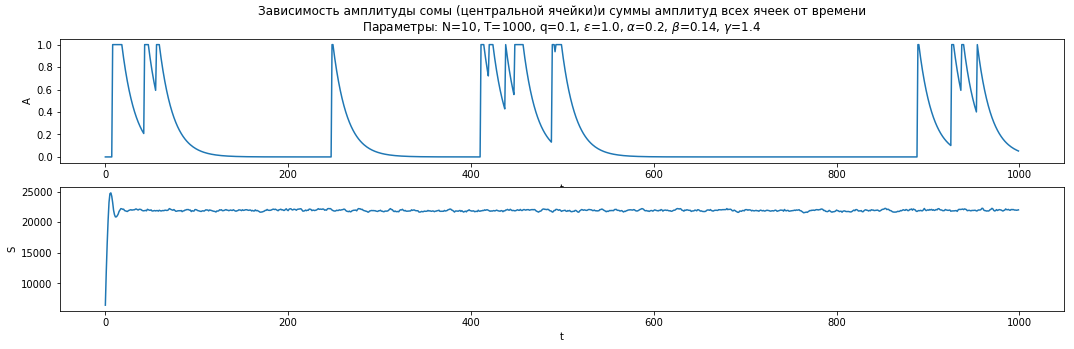

Время выполнения: 69.5 секунд


In [40]:
%matplotlib inline

import numpy.random as rand
import matplotlib.pyplot as plt
import time

start = time.time()

q = .1
epsilon = 1.0
alpha = .2
beta = .14
gamma = 1.4
N = 10
T = 1000
a = [[0] * 3**(N - n) for n in range(N + 1)]

timer = []
amp = []
sum = []

def dissipate(value, level):
    return value*(1 - alpha/(level**.5))

for t in range(T):
    s = 0
    for i in range(len(a[0])):
        if (a[0][i] <= beta and rand.random_sample() < q):
            a[0][i] = epsilon
        else:
            a[0][i] = dissipate(a[0][i], 1)
        s = s + a[0][i]
    for n in range(1, N + 1):
        for j in range(3**(N - n)):
            prevLvlSum = a[n - 1][3*j] + a[n - 1][3*j + 1] + a[n - 1][3*j + 2]
            if (prevLvlSum >= gamma and (a[n][j] <= beta or n == N)):
                a[n][j] = epsilon
            else:
                a[n][j] = dissipate(a[n][j], n)
            s = s + a[n][j]
    timer.append(t)
    amp.append(a[N][0])
    sum.append(s)
print(len(a[0]))

params = r'Параметры: N=%s, T=%s, q=%s, $ \epsilon $=%s, $ \alpha $=%s, $ \beta $=%s, $ \gamma $=%s\
' % (N, T, q, epsilon, alpha, beta, gamma)

plt.figure(1, figsize=(18, 5))
plt.subplot(211)
plt.plot(timer, amp)
plt.xlabel('t')
plt.ylabel('A')
plt.title('Зависимость амплитуды сомы (центральной ячейки)и суммы амплитуд всех ячеек от времени\n'+params)
plt.subplot(212)
plt.plot(timer, sum)
plt.xlabel('t')
plt.ylabel('S')
plt.savefig('summator_%s_%s_%s_%s_%s_%s_%s.png' % (N, T, q, epsilon, alpha, beta, gamma))
plt.show()

finish = time.time()
print('Время выполнения: %s секунд' % round(finish - start, 2))

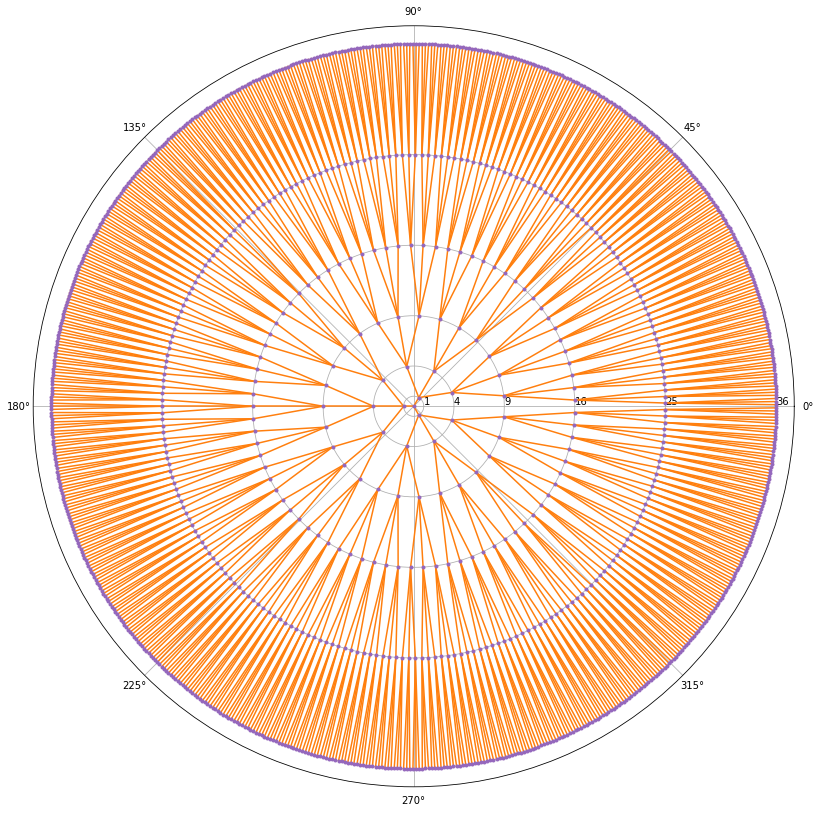

Время выполнения: 1.35 секунд


In [41]:
from numpy import pi
import matplotlib.pyplot as plt
import time

start = time.time()

N = 6
a = [[0] * 3**(N - n) for n in range(N + 1)]

rad = [0]
theta = [0]

plt.figure(2, figsize=(14, 14))
ax = plt.subplot(111, projection='polar')
for n in range(N):
    l = len(a[n])
    for i in range(l):
        rad.append((N - n)**2)
        theta.append(2*pi/l * (i + 1/2))
        if n > 0:
            ax.plot([2*pi/l * (i + 1/2)] * 2, [(N - n)**2, (N - n + 1)**2], 'C1')
            ax.plot(
                [2*pi/l * (i + 1/6), 2*pi/l * (i + 1/2), 2*pi/l * (i + 5/6)],
                [(N - n + 1)**2, (N - n)**2, (N - n + 1)**2],
                'C1'
            )
        if n == N - 1:
            ax.plot([2*pi/l * (i + 1/2)] * 2, [0, (N - n)**2], 'C1')
ax.plot(theta, rad, 'C4.')
ax.set_rmin(0)
ax.set_rticks([n**2 for n in range(1, N + 1)])
ax.set_rlabel_position(0)
plt.show()

finish = time.time()
print('Время выполнения: %s секунд' % round(finish - start, 2))